In [15]:
# To reload when the files change
from support_mvp.backup_plot_diagram.plot_diagram_schrock import *
import sys
import importlib
import matplotlib.pyplot as plt
importlib.reload(sys.modules['support_mvp.backup_plot_diagram'])

<module 'support_mvp.backup_plot_diagram' from '/home/magstr/opt/support_mvp/support_mvp/backup_plot_diagram/__init__.py'>

In [16]:
# Adjust troublesome values
# compare_data['b3lyp_candidate']['Mo_N'] = 0

cmap = cm.get_cmap("tab10")
# colors = cmap.colors
#colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
#colors = ['k','#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
colors = ["k", "#00429d", "0.80"]  # Could also use the color generator above
# Get the reference energy dicts.
dicts = read_parts()

oneup


In [17]:
#plt.rcParams["axes.labelsize"] = 30
#plt.rcParams["axes.fontsize"] = 30

### Functions

In [18]:
def draw_mol(
    mol,
    width=900,
    height=900,
    Hs=False,
    confId=-1,
    multipleConfs=False,
    atomlabel=False,
    hit_ats=None,
    gen_struct=None,
    trajectory=False,
):
    n_cores = options.pop("n_cores")
    p = py3Dmol.view(width=width, height=height)
    
    if isinstance(mol, str):
        xyz_f = open(mol)
        line = xyz_f.read()
        xyz_f.close()
        p.addModel(line, "xyz")
    else:
        if multipleConfs:
            for conf in mol.GetConformers():
                mb = Chem.MolToMolBlock(mol, confId=conf.GetId())
                p.addModel(mb, "sdf")
        else:
            mb = Chem.MolToMolBlock(mol)
            p.addModel(mb, "sdf")
        
    p.setStyle({"stick": {"radius": 0.2}, "sphere":
                {"radius": 0.3}})
    if atomlabel:
        p.addPropertyLabels("index")  # ,{'elem':'H'}
    p.zoomTo()
    p.update()

In [19]:
dict_key = 'parts_orca_b3lyp_sp'

### Plot b3lyp comparison with reference

In [20]:
plt.rcParams.update({'font.size': 22, "axes.labelsize":24})

Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_sp
NH3->N2 : 8.48247880116105
NH3->N2_NH3 : -2.072646460495889
NH3+->NH3 : 1.5236350516788661


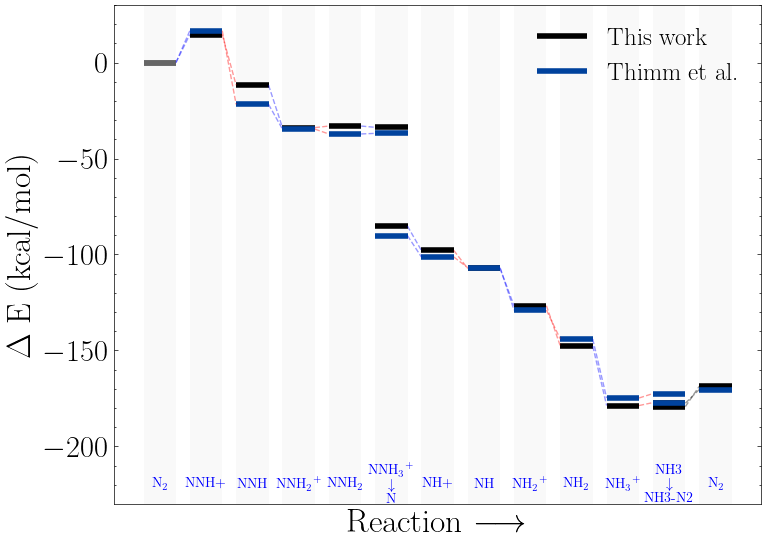

In [21]:

#dict_key2 = "parts_radius_pbe_nogeo_def2"
options = {
    "title": f"",
    "ylim": [-230, 30],
    "ylabel": r"$\Delta$ E (kcal/mol)",
    "save_path": "/home/magstr/Documents/Paper/figures/deltaE.pdf",
    "legend": ["This work", "Thimm et al."],
    "exchange": True,
    "colors": colors,
    "arrows": False,
    "thermal_correction": False,
    "figsize": (10, 6),
    "diagrams": [
        [
            base / "schrock/diagrams_schrock/dft/b3lyp_sp",
            "orca.out",
            "FINAL SINGLE",
            dicts[dict_key],
        ],
    ],
}
options = defaultdict(lambda: False, options)

compare_data  = get_diagram_dicts(options)

compare_data["pbe_paper"] = collection["paper_b3lyp_diagram"]

plot_diagrams(compare_data, options)

### Plot B3LYP comparison with xtb correction

Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_sp
NH3->N2 : 8.48247880116105
NH3->N2_NH3 : -2.072646460495889
NH3+->NH3 : 1.5236350516788661
lol


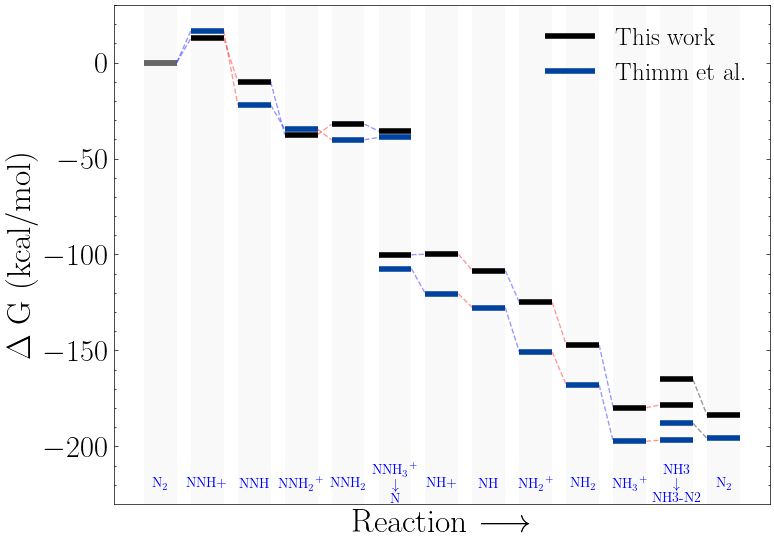

In [22]:
#dict_key2 = "parts_radius_pbe_nogeo_def2"
options = {
    "title": f"",
    "ylim": [-230, 30],
    "ylabel": r"$\Delta$ G (kcal/mol)",
    "save_path": "/home/magstr/Documents/Paper/figures/deltaG_xtbvib.pdf",
    "legend": ["This work", "Thimm et al."],
    "exchange": True,
    "colors": colors,
    "arrows": False,
    "thermal_correction": True,
    "figsize": (10, 6),
    "diagrams": [
        [
            base / "schrock/diagrams_schrock/dft/b3lyp_sp",
            "orca.out",
            "FINAL SINGLE",
            dicts[dict_key],
            Path("/home/magstr/Documents/schrock/diagrams_schrock/vibrations_original_xtb/")
        ],
    ],
}
options = defaultdict(lambda: False, options)

compare_data= get_diagram_dicts(options)

compare_data["pbe_paper"] = collection["paper_b3lyp_diagram_G"]

plot_diagrams(compare_data, options)

# CandidatesCandidate

### Candidate 1

###  Thermal

Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_sp
NH3->N2 : 8.48247880116105
NH3->N2_NH3 : -2.072646460495889
NH3+->NH3 : 1.5236350516788661
lol
Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/C=C(C)CC(C)(C)N
NH3->N2 : -9.27844085264951
NH3->N2_NH3 : 3.490633698645979
NH3+->NH3 : 9.894694034010172
lol


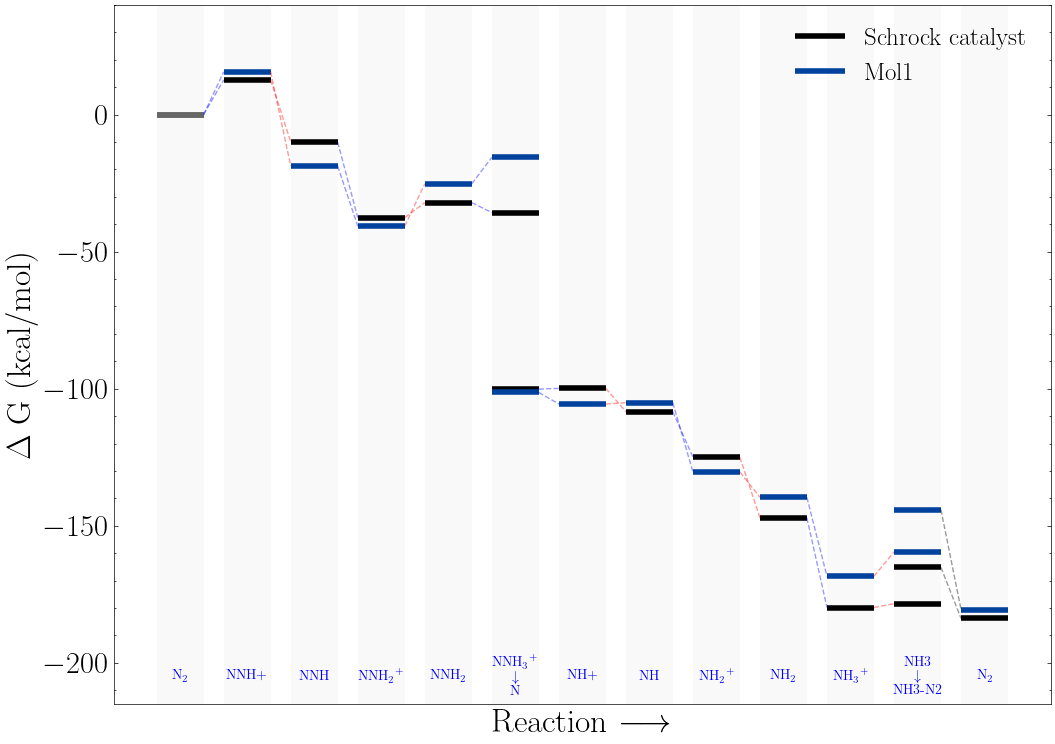

In [24]:
options = {
    "title": f"",
    "ylim": [-215, 40],
    "ylabel": r"$\Delta$ G (kcal/mol)",
    "save_path": "/home/magstr/Documents/Paper/figures/candidates/candidate1_thermal.pdf",
    "legend": ["Schrock catalyst","Mol1"],
    "exchange": True,
    "colors": colors,
    "arrows": False,
    "thermal_correction": True,
    "figsize": (12, 8),
    "diagrams": [
        [
            base / "schrock/diagrams_schrock/dft/b3lyp_sp",
            "orca.out",
            "FINAL SINGLE",
            dicts[dict_key],
            Path("/home/magstr/Documents/schrock/diagrams_schrock/vibrations_original_xtb/")
        ],
        [
            base
            / "schrock/diagrams_schrock/dft/b3lyp_candidates/C=C(C)CC(C)(C)N",
            "orca.out",
            "FINAL SINGLE",
            dicts[dict_key],
            Path("/home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/xtb_vibrations/C=C(C)CC(C)(C)N")
        ],
    ],
}
options = defaultdict(lambda: False, options)

compare_data = get_diagram_dicts(options)

plot_diagrams(compare_data, options)

### Electronic

Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_sp
NH3->N2 : 8.48247880116105
NH3->N2_NH3 : -2.072646460495889
NH3+->NH3 : 1.5236350516788661
Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/C=C(C)CC(C)(C)N
NH3->N2 : -9.27844085264951
NH3->N2_NH3 : 3.490633698645979
NH3+->NH3 : 9.894694034010172


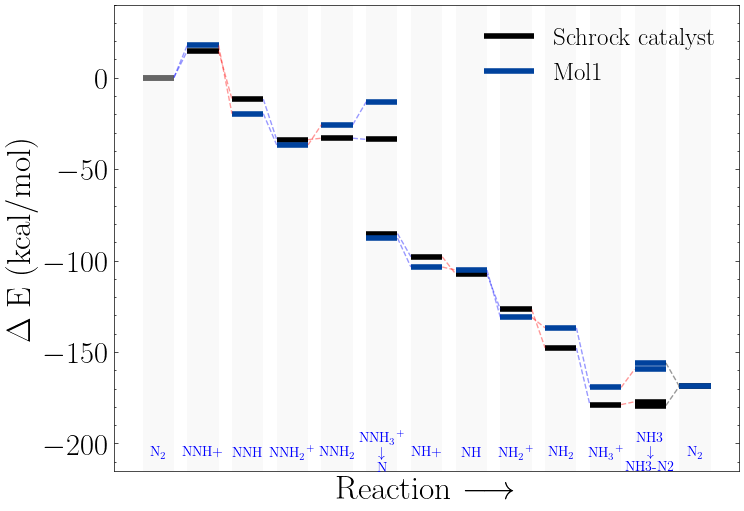

In [25]:
options['save_path'] = "/home/magstr/Documents/Paper/figures/candidates/candidate1.pdf"
options['thermal_correction'] = False
options['ylabel'] = r"$\Delta$ E (kcal/mol)"
options['figsize'] = (8, 8)

compare_data = get_diagram_dicts(options)
plot_diagrams(compare_data, options)

## Candidate 2

### Thermal

Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_sp
NH3->N2 : 8.48247880116105
NH3->N2_NH3 : -2.072646460495889
NH3+->NH3 : 1.5236350516788661
lol
Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/NCCc1ncnc2ccccc12
NH3->N2 : -1.972812126390636
NH3->N2_NH3 : 4.720123135019094
NH3+->NH3 : 11.319995245430619
lol


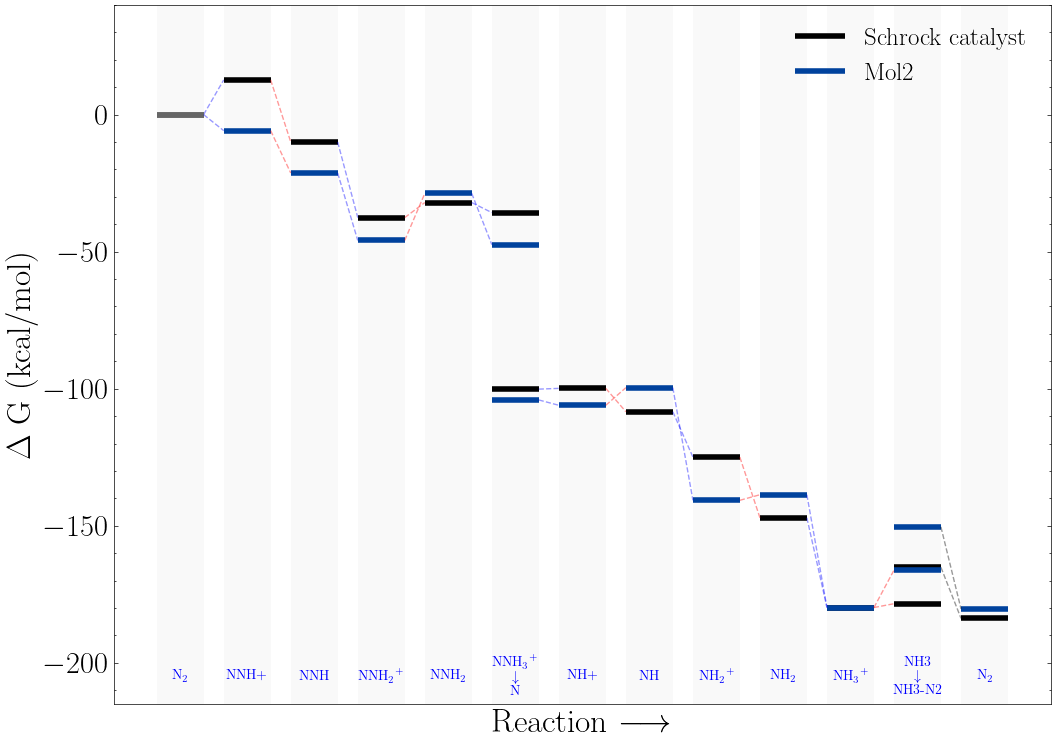

In [27]:
options = {
    "title": f"",
    "ylim": [-215, 40],
    "ylabel": r"$\Delta$ G (kcal/mol)",
    "save_path": "/home/magstr/Documents/Paper/figures/candidates/candidate2_thermal.pdf",
    "legend": ["Schrock catalyst","Mol2"],
    "exchange": True,
    "colors": colors,
    "arrows": False,
    "thermal_correction": True,
    "figsize": (12, 8),
    "diagrams": [
        [
            base / "schrock/diagrams_schrock/dft/b3lyp_sp",
            "orca.out",
            "FINAL SINGLE",
            dicts[dict_key],
            Path("/home/magstr/Documents/schrock/diagrams_schrock/vibrations_original_xtb/")
        ],
        [
            base
            / "schrock/diagrams_schrock/dft/b3lyp_candidates/NCCc1ncnc2ccccc12",
            "orca.out",
            "FINAL SINGLE",
            dicts[dict_key],
            Path("/home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/xtb_vibrations/NCCc1ncnc2ccccc12")
        ],
    ],
}
options = defaultdict(lambda: False, options)

compare_data = get_diagram_dicts(options)

plot_diagrams(compare_data, options)

### Electronic

Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_sp
NH3->N2 : 8.48247880116105
NH3->N2_NH3 : -2.072646460495889
NH3+->NH3 : 1.5236350516788661
Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/NCCc1ncnc2ccccc12
NH3->N2 : -1.972812126390636
NH3->N2_NH3 : 4.720123135019094
NH3+->NH3 : 11.319995245430619


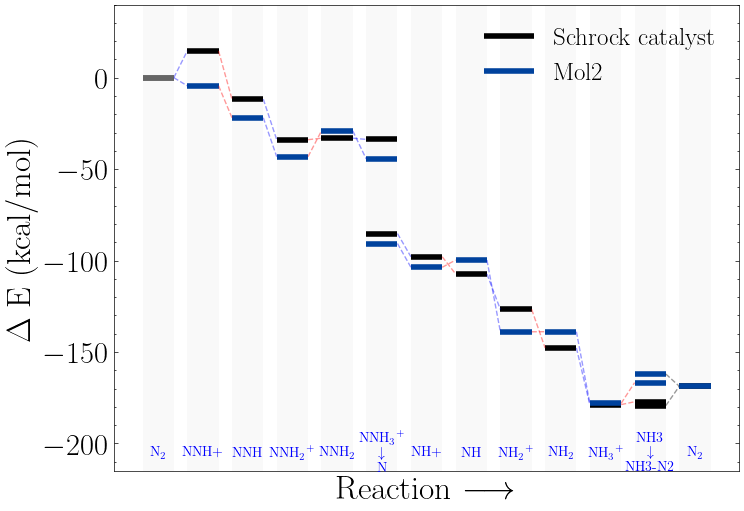

In [28]:
options['save_path'] = "/home/magstr/Documents/Paper/figures/candidates/candidate2.pdf"
options['thermal_correction'] = False
options['ylabel'] = r"$\Delta$ E (kcal/mol)"
options['figsize'] = (8, 8)

compare_data = get_diagram_dicts(options)
plot_diagrams(compare_data, options)

## Candidate 3

### Thermal

Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_sp
NH3->N2 : 8.48247880116105
NH3->N2_NH3 : -2.072646460495889
NH3+->NH3 : 1.5236350516788661
lol
Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/N#Cc1ncc(C(=O)CO)cc1N
NH3->N2 : -7.442760905250907
NH3->N2_NH3 : -17.65318280365318
NH3+->NH3 : -2.2510269307531416
lol


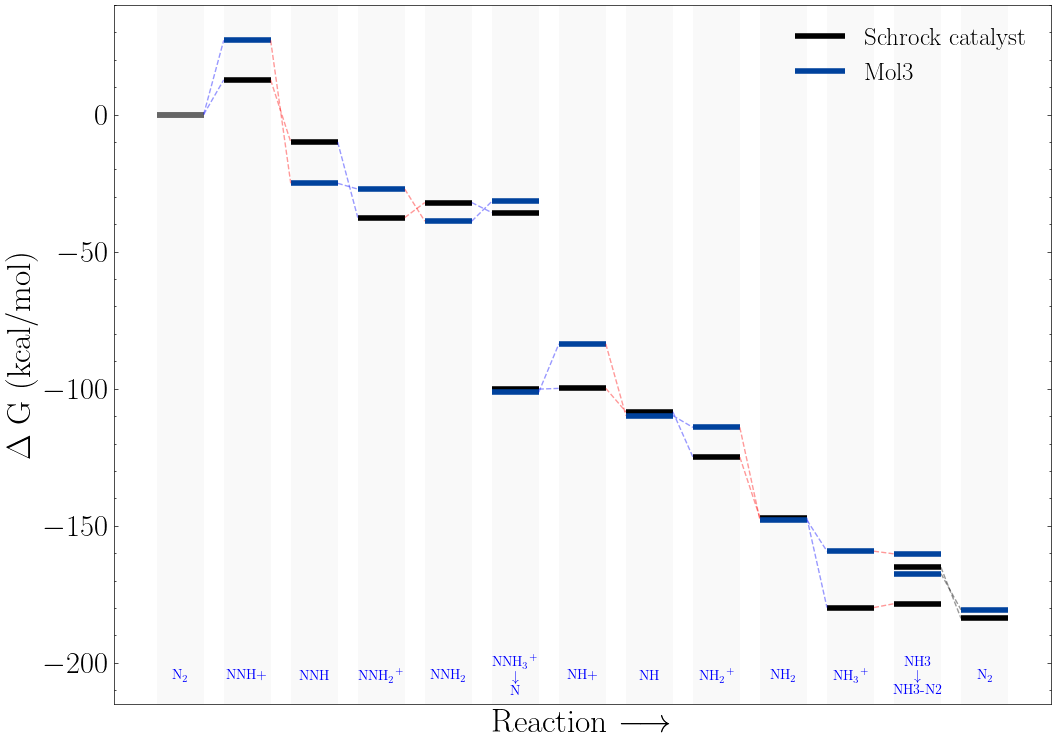

In [29]:
options = {
    "title": f"",
    "ylim": [-215, 40],
    "ylabel": r"$\Delta$ G (kcal/mol)",
    "save_path": "/home/magstr/Documents/Paper/figures/candidates/candidate3_thermal.pdf",
    "legend": ["Schrock catalyst","Mol3"],
    "exchange": True,
    "colors": colors,
    "arrows": False,
    "thermal_correction": True,
    "figsize": (12, 8),
    "diagrams": [
        [
            base / "schrock/diagrams_schrock/dft/b3lyp_sp",
            "orca.out",
            "FINAL SINGLE",
            dicts[dict_key],
            Path("/home/magstr/Documents/schrock/diagrams_schrock/vibrations_original_xtb/")
        ],
        [
            base
            / "schrock/diagrams_schrock/dft/b3lyp_candidates/N#Cc1ncc(C(=O)CO)cc1N",
            "orca.out",
            "FINAL SINGLE",
            dicts[dict_key],
            Path("/home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/xtb_vibrations/N#Cc1ncc(C(=O)CO)cc1N")
            
        ],
    ],
}
options = defaultdict(lambda: False, options)

compare_data = get_diagram_dicts(options)

plot_diagrams(compare_data, options)

### Electronic 

Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_sp
NH3->N2 : 8.48247880116105
NH3->N2_NH3 : -2.072646460495889
NH3+->NH3 : 1.5236350516788661
Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/N#Cc1ncc(C(=O)CO)cc1N
NH3->N2 : -7.442760905250907
NH3->N2_NH3 : -17.65318280365318
NH3+->NH3 : -2.2510269307531416


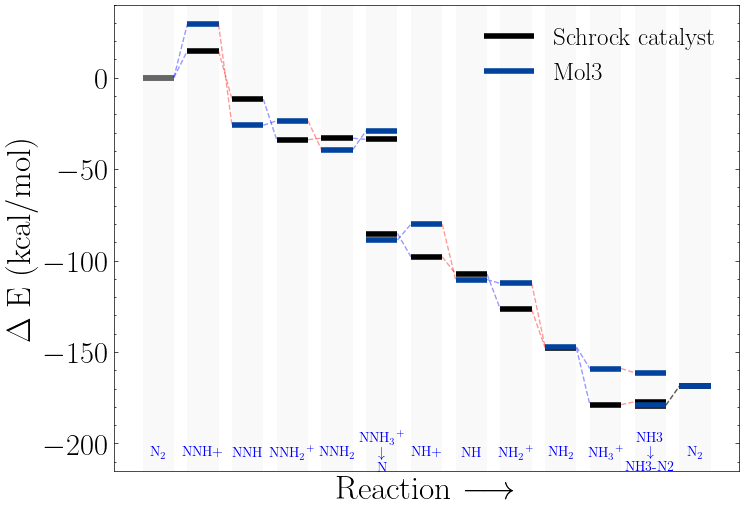

In [30]:
options['save_path'] = "/home/magstr/Documents/Paper/figures/candidates/candidate3.pdf"
options['thermal_correction'] = False
options['ylabel'] = r"$\Delta$ E (kcal/mol)"
options['figsize'] = (8, 8)

compare_data = get_diagram_dicts(options)
plot_diagrams(compare_data, options)

## Candidate 4

### Thermal

Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_sp
NH3->N2 : 8.48247880116105
NH3->N2_NH3 : -2.072646460495889
NH3+->NH3 : 1.5236350516788661
lol
Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/NCCCOc1ccnc2cccnc12
NH3->N2 : -8.283434719778597
NH3->N2_NH3 : -5.719933233689517
NH3+->NH3 : 16.031249658670276
lol


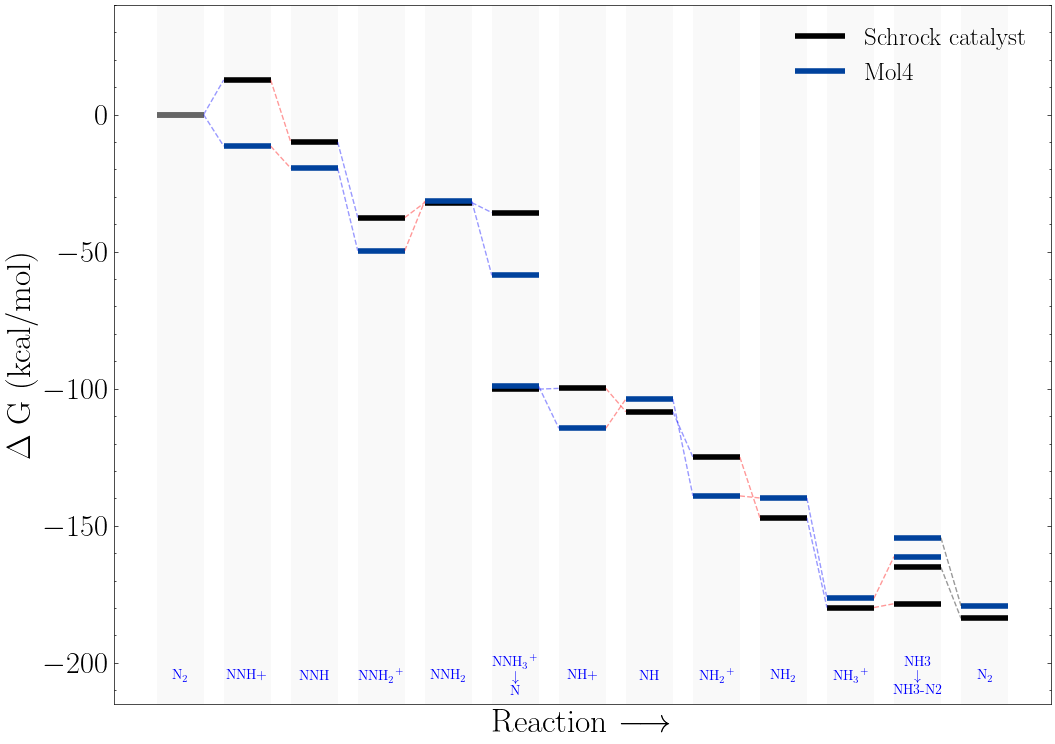

In [31]:
options = {
    "title": f"",
    "ylim": [-215, 40],
    "ylabel": r"$\Delta$ G (kcal/mol)",
    "save_path": "/home/magstr/Documents/Paper/figures/candidates/candidate4_thermal.pdf",
    "legend": ["Schrock catalyst","Mol4"],
    "exchange": True,
    "colors": colors,
    "arrows": False,
    "thermal_correction": True,
    "figsize": (12, 8),
    "diagrams": [
        [
            base / "schrock/diagrams_schrock/dft/b3lyp_sp",
            "orca.out",
            "FINAL SINGLE",
            dicts[dict_key],
            Path("/home/magstr/Documents/schrock/diagrams_schrock/vibrations_original_xtb/")
        ],
        [
            base
            / "schrock/diagrams_schrock/dft/b3lyp_candidates/NCCCOc1ccnc2cccnc12",
            "orca.out",
            "FINAL SINGLE",
            dicts[dict_key],
            Path("/home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/xtb_vibrations/NCCCOc1ccnc2cccnc12")
            
        ],
    ],
}
options = defaultdict(lambda: False, options)

compare_data = get_diagram_dicts(options)

plot_diagrams(compare_data, options)

### Electronic

Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_sp
NH3->N2 : 8.48247880116105
NH3->N2_NH3 : -2.072646460495889
NH3+->NH3 : 1.5236350516788661
Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/NCCCOc1ccnc2cccnc12
NH3->N2 : -8.283434719778597
NH3->N2_NH3 : -5.719933233689517
NH3+->NH3 : 16.031249658670276


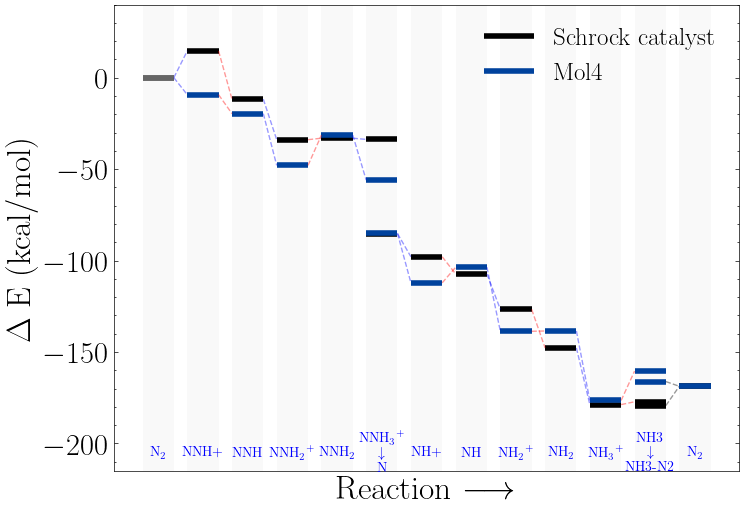

In [32]:
options['save_path'] = "/home/magstr/Documents/Paper/figures/candidates/candidate4.pdf"
options['thermal_correction'] = False
options['ylabel'] = r"$\Delta$ E (kcal/mol)"
options['figsize'] = (8, 8)

compare_data = get_diagram_dicts(options)
plot_diagrams(compare_data, options)

## Canidate 5

Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_sp
NH3->N2 : 8.48247880116105
NH3->N2_NH3 : -2.072646460495889
NH3+->NH3 : 1.5236350516788661
lol
Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/CC(N)Cc1ccc(Cc2ccccc2)cc1
NH3->N2 : -13.84582714131102
NH3->N2_NH3 : 6.152772002853453
NH3+->NH3 : 12.423572551459074
lol


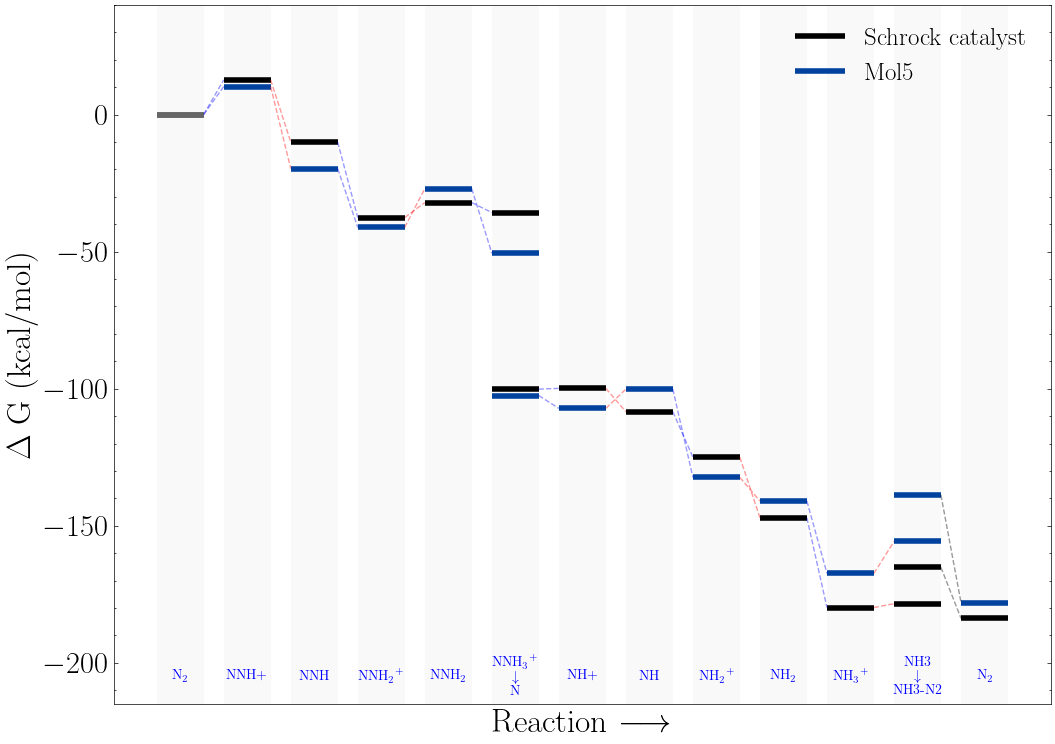

In [33]:
options = {
    "title": f"",
    "ylim": [-215, 40],
    "ylabel": r"$\Delta$ G (kcal/mol)",
    "save_path": "/home/magstr/Documents/Paper/figures/candidates/candidate5_thermal.pdf",
    "legend": ["Schrock catalyst","Mol5"],
    "exchange": True,
    "colors": colors,
    "arrows": False,
    "thermal_correction": True,
    "figsize": (12, 8),
    "diagrams": [
        [
            base / "schrock/diagrams_schrock/dft/b3lyp_sp",
            "orca.out",
            "FINAL SINGLE",
            dicts[dict_key],
            Path("/home/magstr/Documents/schrock/diagrams_schrock/vibrations_original_xtb/")
        ],
        [
            base
            / "schrock/diagrams_schrock/dft/b3lyp_candidates/CC(N)Cc1ccc(Cc2ccccc2)cc1",
            "orca.out",
            "FINAL SINGLE",
            dicts[dict_key],
            Path("/home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/xtb_vibrations/CC(N)Cc1ccc(Cc2ccccc2)cc1")
            
        ],
    ],
}
options = defaultdict(lambda: False, options)

compare_data = get_diagram_dicts(options)

plot_diagrams(compare_data, options)

### Electronic

Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_sp
NH3->N2 : 8.48247880116105
NH3->N2_NH3 : -2.072646460495889
NH3+->NH3 : 1.5236350516788661
Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/CC(N)Cc1ccc(Cc2ccccc2)cc1
NH3->N2 : -13.84582714131102
NH3->N2_NH3 : 6.152772002853453
NH3+->NH3 : 12.423572551459074


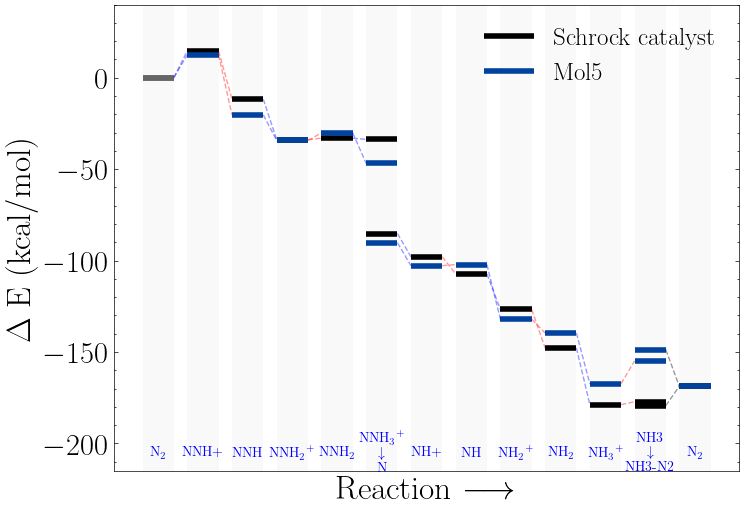

In [34]:
options['save_path'] = "/home/magstr/Documents/Paper/figures/candidates/candidate5.pdf"
options['thermal_correction'] = False
options['ylabel'] = r"$\Delta$ E (kcal/mol)"
options['figsize'] = (8, 8)

compare_data = get_diagram_dicts(options)
plot_diagrams(compare_data, options)

## Candidate 6

Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_sp
NH3->N2 : 8.48247880116105
NH3->N2_NH3 : -2.072646460495889
NH3+->NH3 : 1.5236350516788661
lol
Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/CC(C)(N)CCC1CCCCC1
NH3->N2 : -13.96567478775978
NH3->N2_NH3 : 1.7728243041783571
NH3+->NH3 : 10.334147303830832
lol


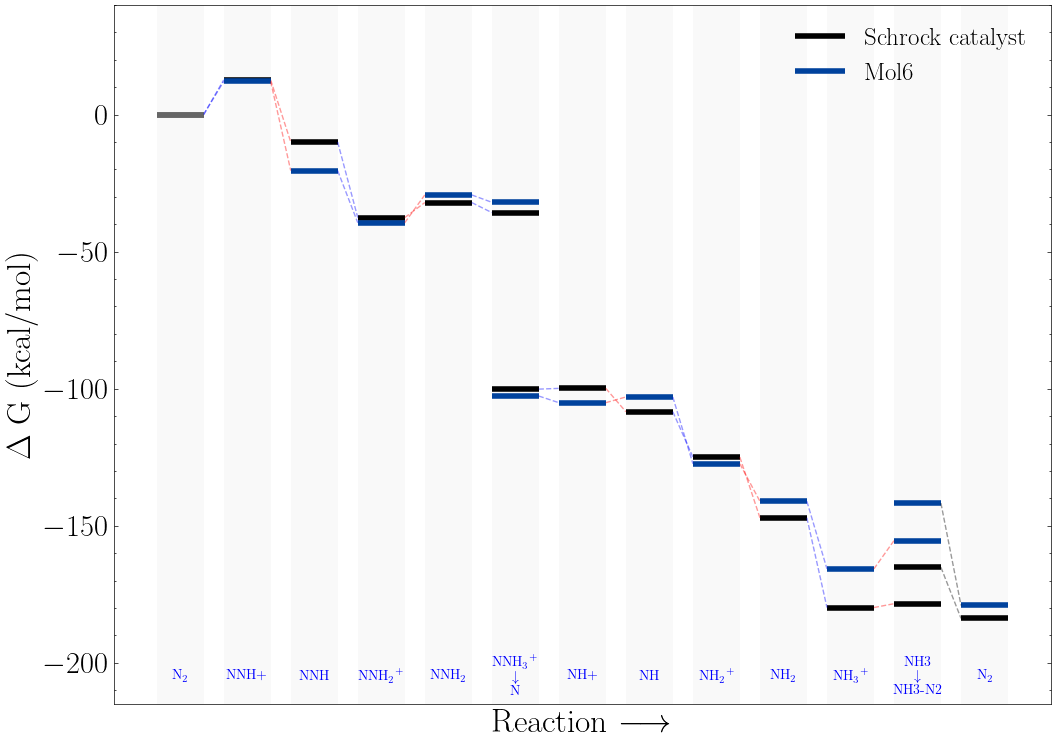

In [35]:
options = {
    "title": f"",
    "ylim": [-215, 40],
    "ylabel": r"$\Delta$ G (kcal/mol)",
    "save_path": "/home/magstr/Documents/Paper/figures/candidates/candidate6_thermal.pdf",
    "legend": ["Schrock catalyst","Mol6"],
    "exchange": True,
    "colors": colors,
    "arrows": False,
    "thermal_correction": True,
    "figsize": (12, 8),
    "diagrams": [
        [
            base / "schrock/diagrams_schrock/dft/b3lyp_sp",
            "orca.out",
            "FINAL SINGLE",
            dicts[dict_key],
            Path("/home/magstr/Documents/schrock/diagrams_schrock/vibrations_original_xtb/")
        ],
        [
            base
            / "schrock/diagrams_schrock/dft/b3lyp_candidates/CC(C)(N)CCC1CCCCC1",
            "orca.out",
            "FINAL SINGLE",
            dicts[dict_key],
            Path("/home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/xtb_vibrations/CC(C)(N)CCC1CCCCC1")
            
        ],
    ],
}
options = defaultdict(lambda: False, options)

compare_data = get_diagram_dicts(options)

plot_diagrams(compare_data, options)

### Electronic

Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_sp
NH3->N2 : 8.48247880116105
NH3->N2_NH3 : -2.072646460495889
NH3+->NH3 : 1.5236350516788661
Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/CC(C)(N)CCC1CCCCC1
NH3->N2 : -13.96567478775978
NH3->N2_NH3 : 1.7728243041783571
NH3+->NH3 : 10.334147303830832


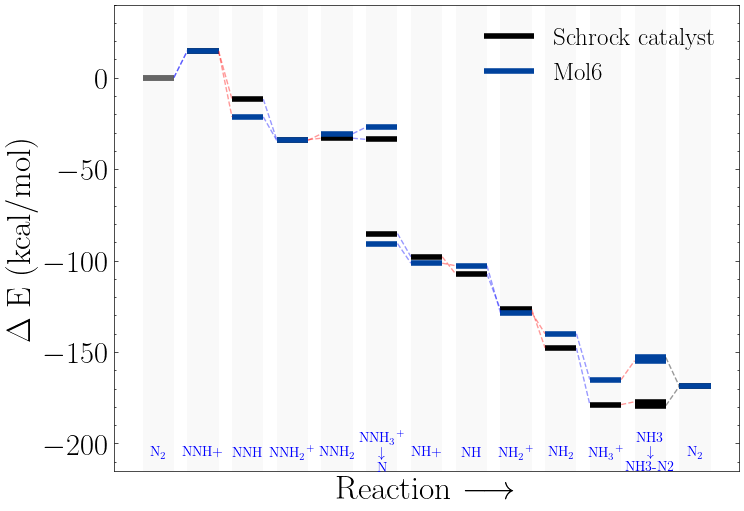

In [36]:
options['save_path'] = "/home/magstr/Documents/Paper/figures/candidates/candidate6.pdf"
options['thermal_correction'] = False
options['ylabel'] = r"$\Delta$ E (kcal/mol)"
options['figsize'] = (8, 8)

compare_data = get_diagram_dicts(options)
plot_diagrams(compare_data, options)

## Candidate 7

Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_sp
NH3->N2 : 8.48247880116105
NH3->N2_NH3 : -2.072646460495889
NH3+->NH3 : 1.5236350516788661
lol
Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/CC(N)Cc1ccc(CCl)cc1
NH3->N2 : -11.315778146032244
NH3->N2_NH3 : 3.515264156740159
NH3+->NH3 : 12.142576272599399
lol


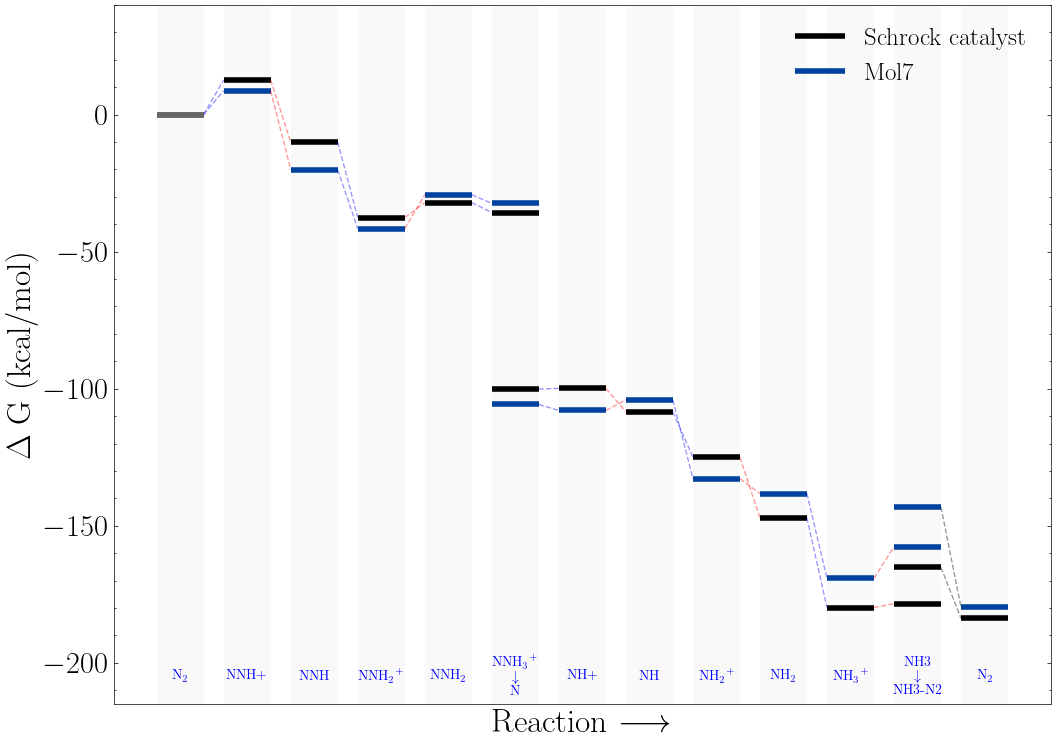

In [38]:
options = {
    "title": f"",
    "ylim": [-215, 40],
    "ylabel": r"$\Delta$ G (kcal/mol)",
    "save_path": "/home/magstr/Documents/Paper/figures/candidates/candidate7_thermal.pdf",
    "legend": ["Schrock catalyst", "Mol7"],
    "exchange": True,
    "colors": colors,
    "arrows": False,
    "thermal_correction": True,
    "figsize": (12, 8),
    "diagrams": [
        [
            base / "schrock/diagrams_schrock/dft/b3lyp_sp",
            "orca.out",
            "FINAL SINGLE",
            dicts[dict_key],
            Path("/home/magstr/Documents/schrock/diagrams_schrock/vibrations_original_xtb/")
        ],
        [
            base
            / "schrock/diagrams_schrock/dft/b3lyp_candidates/CC(N)Cc1ccc(CCl)cc1",
            "orca.out",
            "FINAL SINGLE",
            dicts[dict_key],
            Path("/home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/xtb_vibrations/CC(N)Cc1ccc(CCl)cc1")
            
        ],
    ],
}
options = defaultdict(lambda: False, options)

compare_data = get_diagram_dicts(options)

plot_diagrams(compare_data, options)

### Electronic

Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_sp
NH3->N2 : 8.48247880116105
NH3->N2_NH3 : -2.072646460495889
NH3+->NH3 : 1.5236350516788661
Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/CC(N)Cc1ccc(CCl)cc1
NH3->N2 : -11.315778146032244
NH3->N2_NH3 : 3.515264156740159
NH3+->NH3 : 12.142576272599399


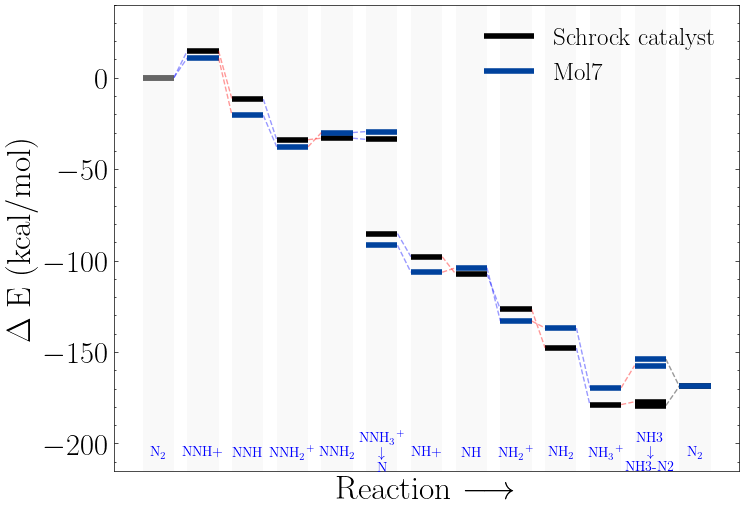

In [39]:
options['save_path'] = "/home/magstr/Documents/Paper/figures/candidates/candidate7.pdf"
options['thermal_correction'] = False
options['ylabel'] = r"$\Delta$ E (kcal/mol)"
options['figsize'] = (8, 8)

compare_data = get_diagram_dicts(options)
plot_diagrams(compare_data, options)

## Candidate 8

Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_sp
NH3->N2 : 8.48247880116105
NH3->N2_NH3 : -2.072646460495889
NH3+->NH3 : 1.5236350516788661
lol
Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/N#Cc1cnc(C#N)c(N)c1
NH3->N2 : 27.735363428946584
NH3->N2_NH3 : 11.178820024244487
NH3+->NH3 : -22.416826225351542
lol


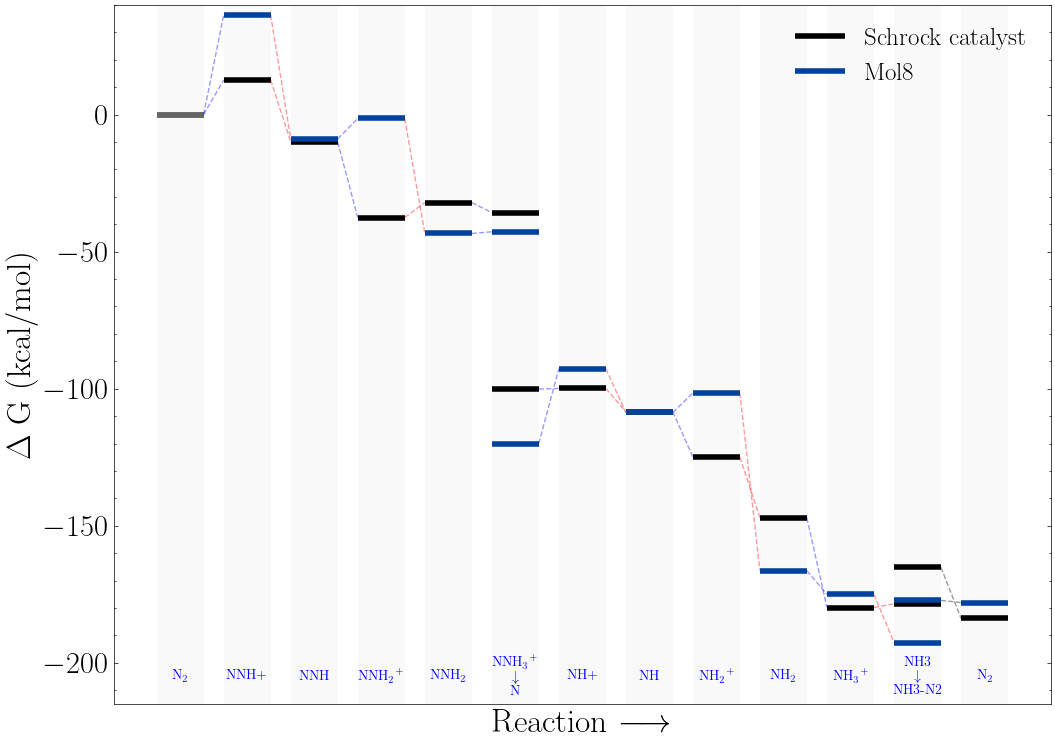

In [40]:
options = {
    "title": f"",
    "ylim": [-215, 40],
    "ylabel": r"$\Delta$ G (kcal/mol)",
    "save_path": "/home/magstr/Documents/Paper/figures/candidates/candidate8_thermal.pdf",
    "legend": ["Schrock catalyst", "Mol8"],
    "exchange": True,
    "colors": colors,
    "arrows": False,
    "thermal_correction": True,
    "figsize": (12, 8),
    "diagrams": [
        [
            base / "schrock/diagrams_schrock/dft/b3lyp_sp",
            "orca.out",
            "FINAL SINGLE",
            dicts[dict_key],
            Path("/home/magstr/Documents/schrock/diagrams_schrock/vibrations_original_xtb/")
        ],
        [
            base
            / "schrock/diagrams_schrock/dft/b3lyp_candidates/N#Cc1cnc(C#N)c(N)c1",
            "orca.out",
            "FINAL SINGLE",
            dicts[dict_key],
            Path("/home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/xtb_vibrations/N#Cc1cnc(C#N)c(N)c1")
            
        ],
    ],
}
options = defaultdict(lambda: False, options)

compare_data = get_diagram_dicts(options)

plot_diagrams(compare_data, options)

### Electronic

Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_sp
NH3->N2 : 8.48247880116105
NH3->N2_NH3 : -2.072646460495889
NH3+->NH3 : 1.5236350516788661
Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/N#Cc1cnc(C#N)c(N)c1
NH3->N2 : 27.735363428946584
NH3->N2_NH3 : 11.178820024244487
NH3+->NH3 : -22.416826225351542


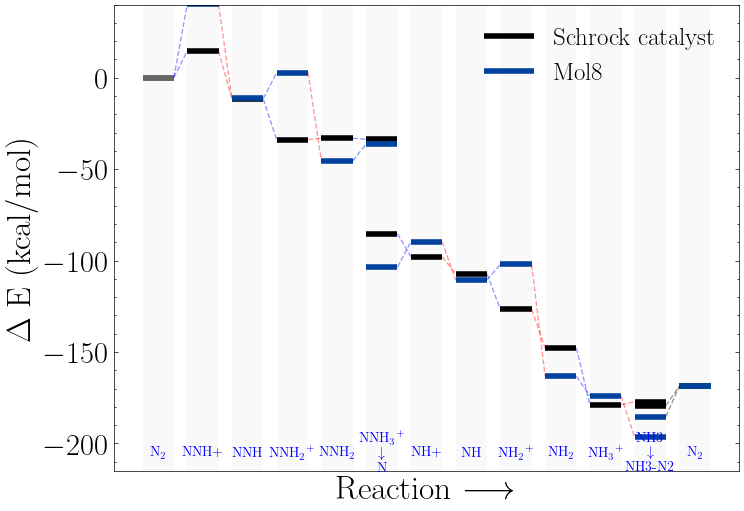

In [41]:
options['save_path'] = "/home/magstr/Documents/Paper/figures/candidates/candidate8.pdf"
options['thermal_correction'] = False
options['ylabel'] = r"$\Delta$ E (kcal/mol)"
options['figsize'] = (8, 8)

compare_data = get_diagram_dicts(options)
plot_diagrams(compare_data, options)

## Candidate 9

Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_sp
NH3->N2 : 8.48247880116105
NH3->N2_NH3 : -2.072646460495889
NH3+->NH3 : 1.5236350516788661
lol
Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/N#Cc1ccnc(C#N)c1N
NH3->N2 : -19.67271357541904
NH3->N2_NH3 : -19.407682033255696
NH3+->NH3 : 5.225624382030219
lol


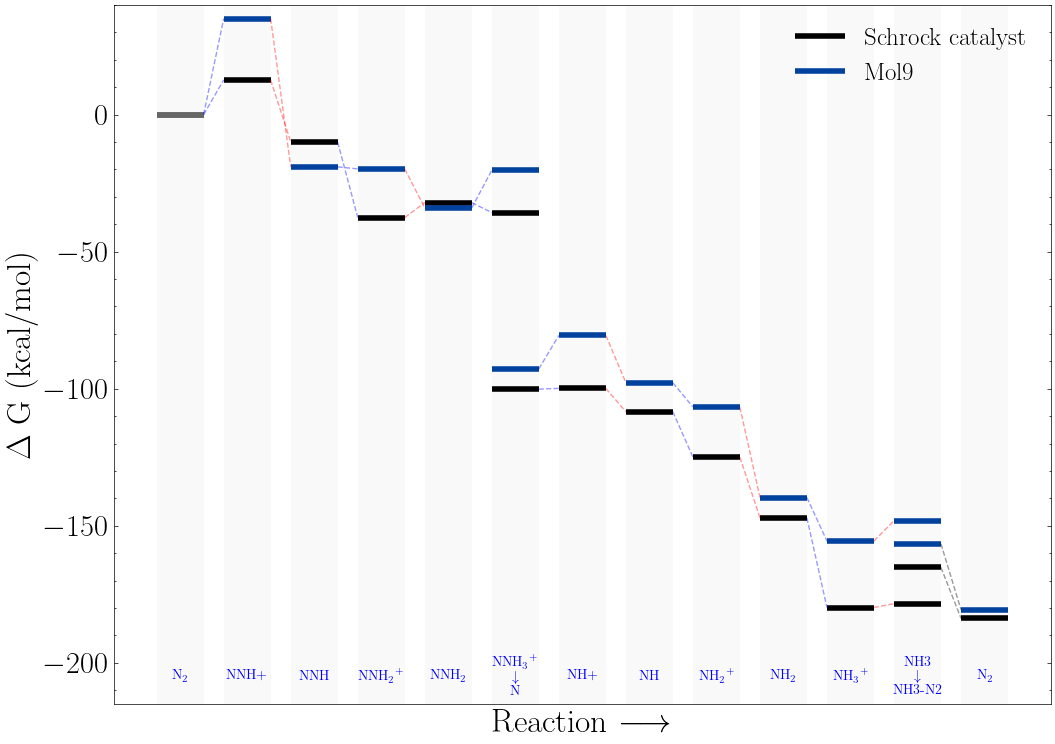

In [42]:
options = {
    "title": f"",
    "ylim": [-215, 40],
    "ylabel": r"$\Delta$ G (kcal/mol)",
    "save_path": "/home/magstr/Documents/Paper/figures/candidates/candidate9_thermal.pdf",
    "legend": ["Schrock catalyst", "Mol9"],
    "exchange": True,
    "colors": colors,
    "arrows": False,
    "thermal_correction": True,
    "figsize": (12, 8),
    "diagrams": [
        [
            base / "schrock/diagrams_schrock/dft/b3lyp_sp",
            "orca.out",
            "FINAL SINGLE",
            dicts[dict_key],
            Path("/home/magstr/Documents/schrock/diagrams_schrock/vibrations_original_xtb/")
        ],
        [
            base
            / "schrock/diagrams_schrock/dft/b3lyp_candidates/N#Cc1ccnc(C#N)c1N",
            "orca.out",
            "FINAL SINGLE",
            dicts[dict_key],
            Path("/home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/xtb_vibrations/N#Cc1ccnc(C#N)c1N")
            
        ],
    ],
}
options = defaultdict(lambda: False, options)

compare_data = get_diagram_dicts(options)

plot_diagrams(compare_data, options)

### Electronic

Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_sp
NH3->N2 : 8.48247880116105
NH3->N2_NH3 : -2.072646460495889
NH3+->NH3 : 1.5236350516788661
Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/N#Cc1ccnc(C#N)c1N
NH3->N2 : -19.67271357541904
NH3->N2_NH3 : -19.407682033255696
NH3+->NH3 : 5.225624382030219


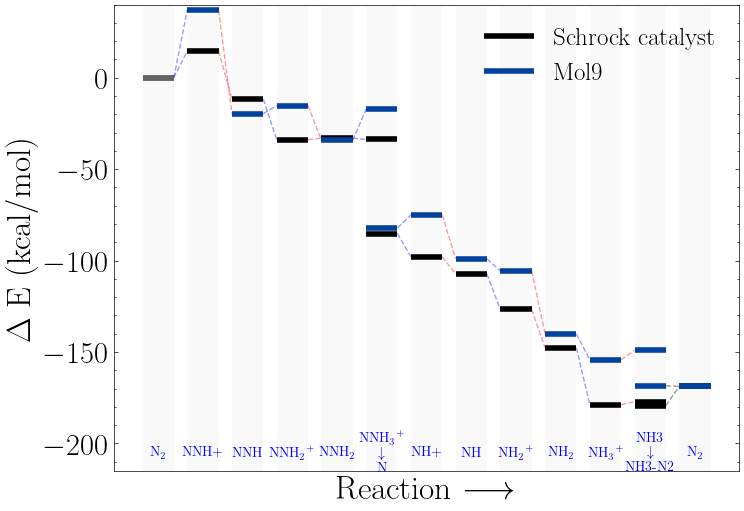

In [44]:
options['save_path'] = "/home/magstr/Documents/Paper/figures/candidates/candidate9.pdf"
options['thermal_correction'] = False
options['ylabel'] = r"$\Delta$ E (kcal/mol)"
options['figsize'] = (8, 8)

compare_data = get_diagram_dicts(options)
plot_diagrams(compare_data, options)

## Candidate 10

Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_sp
NH3->N2 : 8.48247880116105
NH3->N2_NH3 : -2.072646460495889
NH3+->NH3 : 1.5236350516788661
lol
Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/N#Cc1ccnc(C(=O)Cl)c1N
NH3->N2 : -5.6330751813948154
NH3->N2_NH3 : -2.417197547852993
NH3+->NH3 : -8.694264298770577
lol


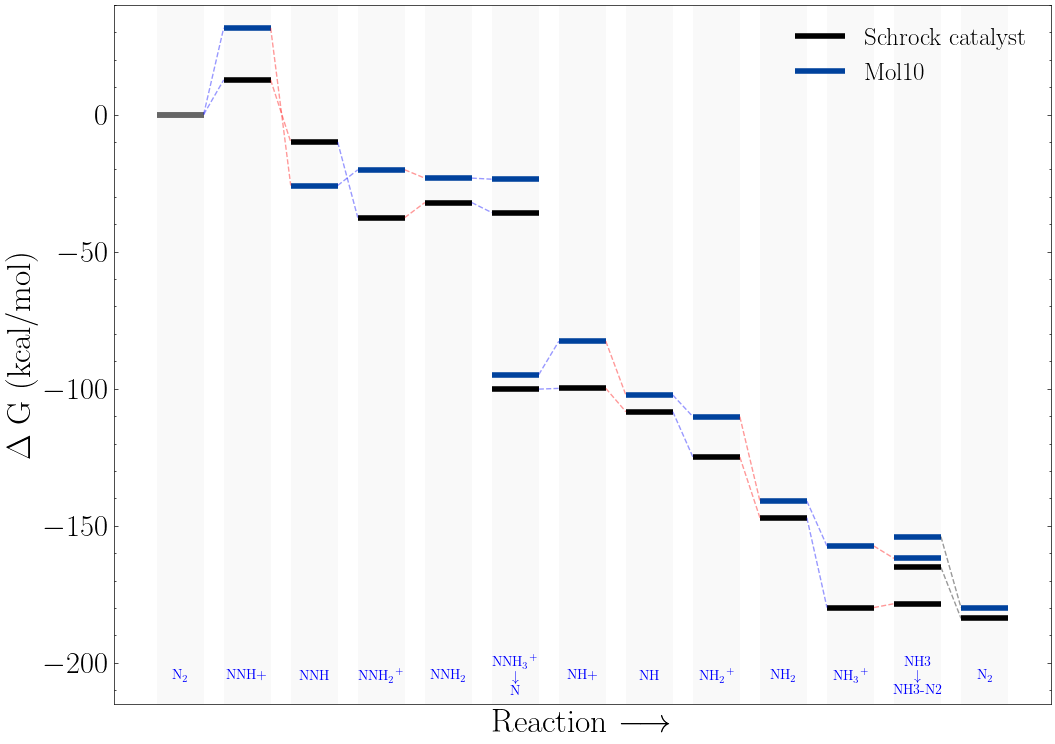

In [45]:
options = {
    "title": f"",
    "ylim": [-215, 40],
    "ylabel": r"$\Delta$ G (kcal/mol)",
    "save_path": "/home/magstr/Documents/Paper/figures/candidates/candidate10_thermal.pdf",
    "legend": ["Schrock catalyst", "Mol10"],
    "exchange": True,
    "colors": colors,
    "arrows": False,
    "thermal_correction": True,
    "figsize": (12, 8),
    "diagrams": [
        [
            base / "schrock/diagrams_schrock/dft/b3lyp_sp",
            "orca.out",
            "FINAL SINGLE",
            dicts[dict_key],
            Path("/home/magstr/Documents/schrock/diagrams_schrock/vibrations_original_xtb/")
        ],
        [
            base
            / "schrock/diagrams_schrock/dft/b3lyp_candidates/N#Cc1ccnc(C(=O)Cl)c1N",
            "orca.out",
            "FINAL SINGLE",
            dicts[dict_key],
            Path("/home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/xtb_vibrations/N#Cc1ccnc(C(=O)Cl)c1N")
            
        ],
    ],
}
options = defaultdict(lambda: False, options)
8
compare_data = get_diagram_dicts(options)

plot_diagrams(compare_data, options)

### Electronic

Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_sp
NH3->N2 : 8.48247880116105
NH3->N2_NH3 : -2.072646460495889
NH3+->NH3 : 1.5236350516788661
Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/N#Cc1ccnc(C(=O)Cl)c1N
NH3->N2 : -5.6330751813948154
NH3->N2_NH3 : -2.417197547852993
NH3+->NH3 : -8.694264298770577


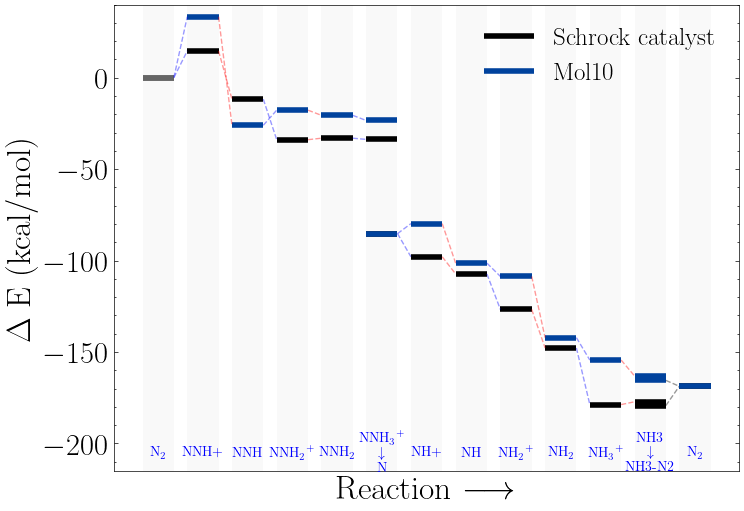

In [46]:
options['save_path'] = "/home/magstr/Documents/Paper/figures/candidates/candidate10.pdf"
options['thermal_correction'] = False
options['ylabel'] = r"$\Delta$ E (kcal/mol)"
options['figsize'] = (8, 8)

compare_data = get_diagram_dicts(options)
plot_diagrams(compare_data, options)

## Candidate 11

Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_sp
NH3->N2 : 8.48247880116105
NH3->N2_NH3 : -2.072646460495889
NH3+->NH3 : 1.5236350516788661
lol
Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/CCCOC(=O)NCC1(N)CCCCC1
NH3->N2 : -1.2531480826437473
NH3->N2_NH3 : 13.00312846712768
NH3+->NH3 : 9.074571898207068
lol


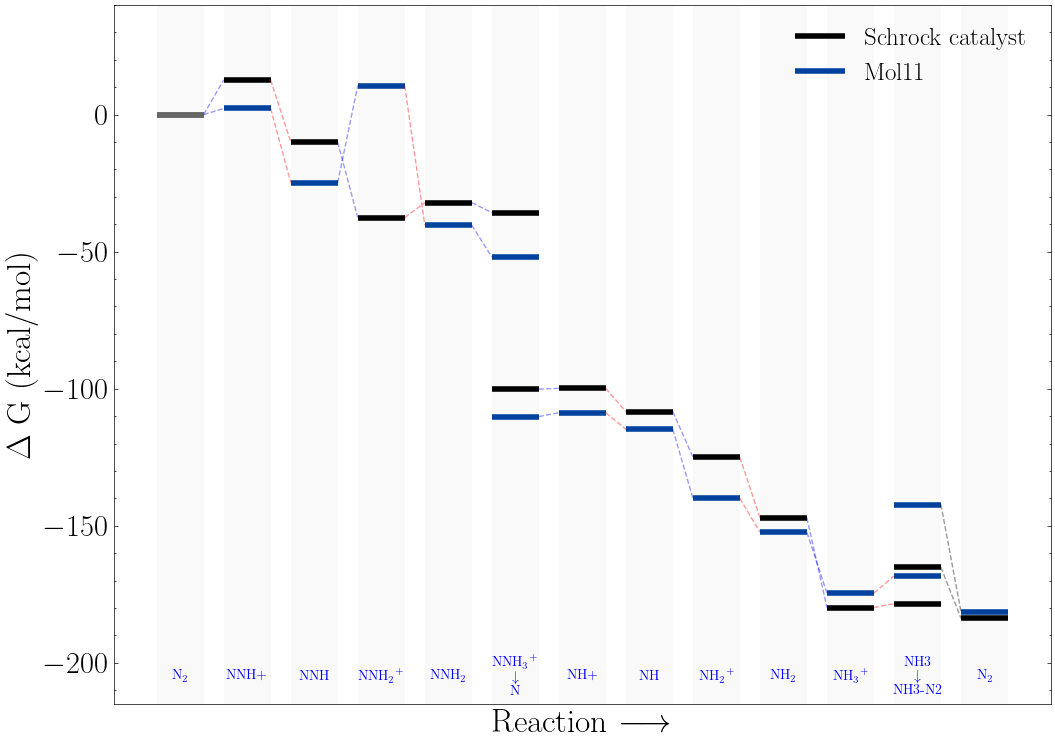

In [51]:
options = {
    "title": f"",
    "ylim": [-215, 40],
    "ylabel": r"$\Delta$ G (kcal/mol)",
    "save_path": "/home/magstr/Documents/Paper/figures/candidates/candidate11_thermal.pdf",
    "legend": ["Schrock catalyst", "Mol11"],
    "exchange": True,
    "colors": colors,
    "arrows": False,
    "thermal_correction": True,
    "figsize": (12, 8),
    "diagrams": [
        [
            base / "schrock/diagrams_schrock/dft/b3lyp_sp",
            "orca.out",
            "FINAL SINGLE",
            dicts[dict_key],
            Path("/home/magstr/Documents/schrock/diagrams_schrock/vibrations_original_xtb/")
        ],
        [
            base
            / "schrock/diagrams_schrock/dft/b3lyp_candidates/CCCOC(=O)NCC1(N)CCCCC1",
            "orca.out",
            "FINAL SINGLE",
            dicts[dict_key],
            Path("/home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/xtb_vibrations/CCCOC(=O)NCC1(N)CCCCC1")
            
        ],
    ],
}
options = defaultdict(lambda: False, options)
8
compare_data = get_diagram_dicts(options)

plot_diagrams(compare_data, options)

### Electronic

Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_sp
NH3->N2 : 8.48247880116105
NH3->N2_NH3 : -2.072646460495889
NH3+->NH3 : 1.5236350516788661
Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/CCCOC(=O)NCC1(N)CCCCC1
NH3->N2 : -1.2531480826437473
NH3->N2_NH3 : 13.00312846712768
NH3+->NH3 : 9.074571898207068


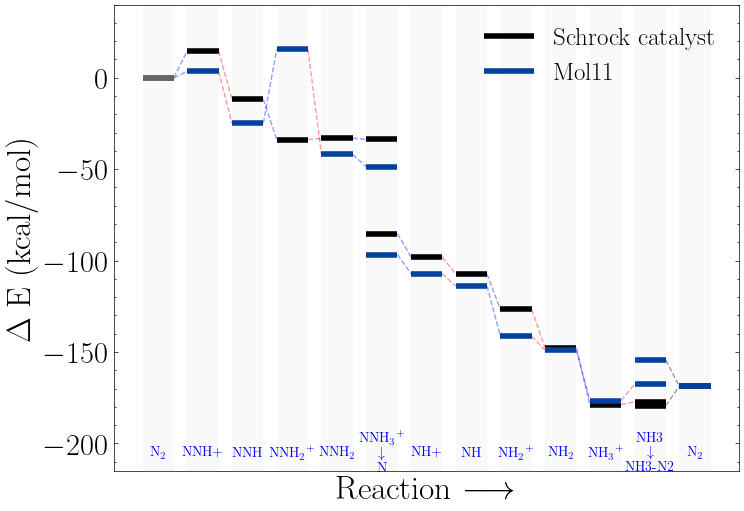

In [48]:
options['save_path'] = "/home/magstr/Documents/Paper/figures/candidates/candidate11.pdf"
options['thermal_correction'] = False
options['ylabel'] = r"$\Delta$ E (kcal/mol)"
options['figsize'] = (8, 8)

compare_data = get_diagram_dicts(options)
plot_diagrams(compare_data, options)

## Candidate 12

Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_sp
NH3->N2 : 8.48247880116105
NH3->N2_NH3 : -2.072646460495889
NH3+->NH3 : 1.5236350516788661
lol
Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/NCCOC(=O)c1ncnc2ccccc12
NH3->N2 : 10.726872190833092
NH3->N2_NH3 : -6.779782804660499
NH3+->NH3 : -15.030039471574128
lol


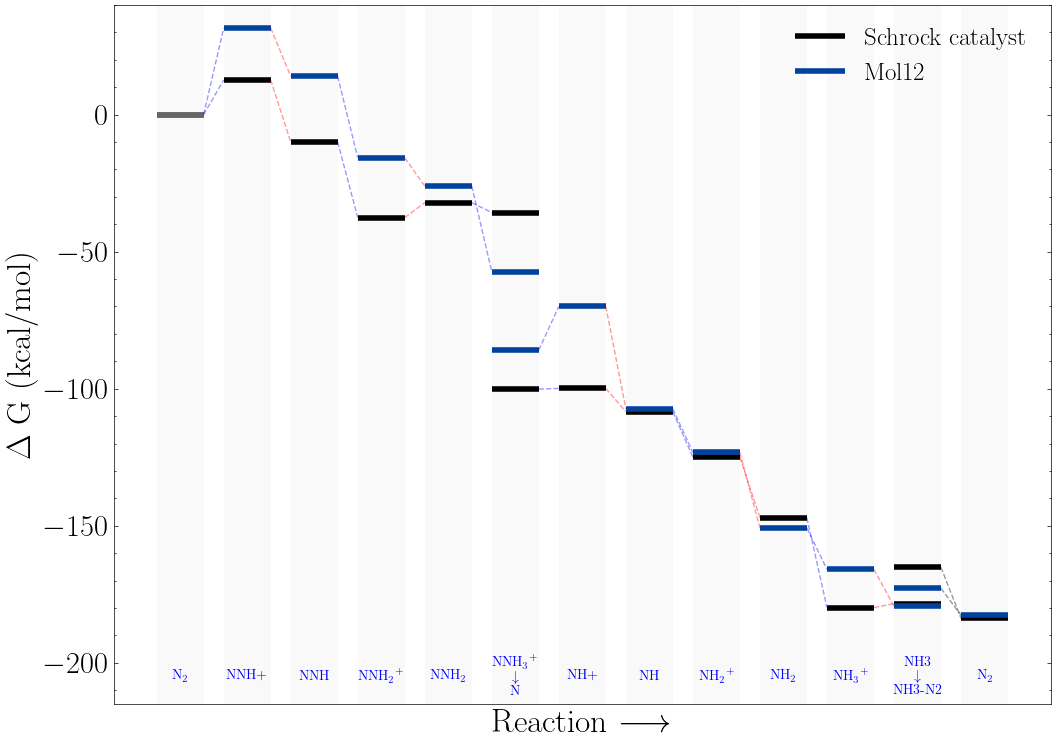

In [49]:
options = {
    "title": f"",
    "ylim": [-215, 40],
    "ylabel": r"$\Delta$ G (kcal/mol)",
    "save_path": "/home/magstr/Documents/Paper/figures/candidates/candidate12_thermal.pdf",
    "legend": ["Schrock catalyst", "Mol12"],
    "exchange": True,
    "colors": colors,
    "arrows": False,
    "thermal_correction": True,
    "figsize": (12, 8),
    "diagrams": [
        [
            base / "schrock/diagrams_schrock/dft/b3lyp_sp",
            "orca.out",
            "FINAL SINGLE",
            dicts[dict_key],
            Path("/home/magstr/Documents/schrock/diagrams_schrock/vibrations_original_xtb/")
        ],
        [
            base
            / "schrock/diagrams_schrock/dft/b3lyp_candidates/NCCOC(=O)c1ncnc2ccccc12",
            "orca.out",
            "FINAL SINGLE",
            dicts[dict_key],
            Path("/home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/xtb_vibrations/NCCOC(=O)c1ncnc2ccccc12")
            
        ],
    ],
}
options = defaultdict(lambda: False, options)
compare_data = get_diagram_dicts(options)

plot_diagrams(compare_data, options)

### Electronic

Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_sp
NH3->N2 : 8.48247880116105
NH3->N2_NH3 : -2.072646460495889
NH3+->NH3 : 1.5236350516788661
Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/b3lyp_candidates/NCCOC(=O)c1ncnc2ccccc12
NH3->N2 : 10.726872190833092
NH3->N2_NH3 : -6.779782804660499
NH3+->NH3 : -15.030039471574128


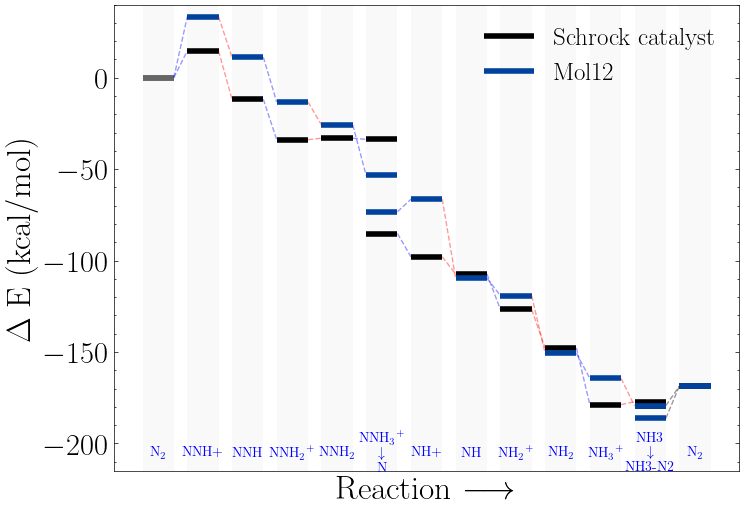

In [50]:
options['save_path'] = "/home/magstr/Documents/Paper/figures/candidates/candidate12.pdf"
options['thermal_correction'] = False
options['ylabel'] = r"$\Delta$ E (kcal/mol)"
options['figsize'] = (8, 8)

compare_data = get_diagram_dicts(options)
plot_diagrams(compare_data, options)

# Radius profiles

In [18]:
dict_key = "parts_orca"
options = {
    "title": f"",
    "ylim": [-130, 20],
    "ylabel": r"$\Delta$ E (kcal/mol)",
    "save_path": "/home/magstr/Documents/Paper/figures/tmp.png",
    "legend": ["Standard CPCM radii", "With COSMO radii"],
    "exchange": True,
    "colors": colors,
    "arrows": False,
    "thermal_correction": False,
    "figsize": (12, 12),
    "diagrams": [
        [
            base / "schrock/diagrams_schrock/dft/cycle_orca_fullyconverged_sarcJ",
            "orca_stepsize.out",
            "FINAL SINGLE",
            dicts[dict_key],
            Path("/home/magstr/Documents/schrock/diagrams_schrock/vibrations_original_xtb/")
        ],
    ],
}
options = defaultdict(lambda: False, options)

compare_data = get_diagram_dicts(options)

Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/cycle_orca_fullyconverged_sarcJ
NH3->N2 : -11.18007980659604
NH3->N2_NH3 : -13.813871419988573
NH3+->NH3 : 10.469372462714091


Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/cycle_orca_fullyconverged_sarcJ
NH3->N2 : -11.269417158327997
NH3->N2_NH3 : -13.799883699975908
NH3+->NH3 : 17.72153281304054
Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/cycle_orca_fullyconverged_radius_pbe
NH3->N2 : -10.785583401098847
NH3->N2_NH3 : -5.360379370860755
NH3+->NH3 : 17.53135614725761


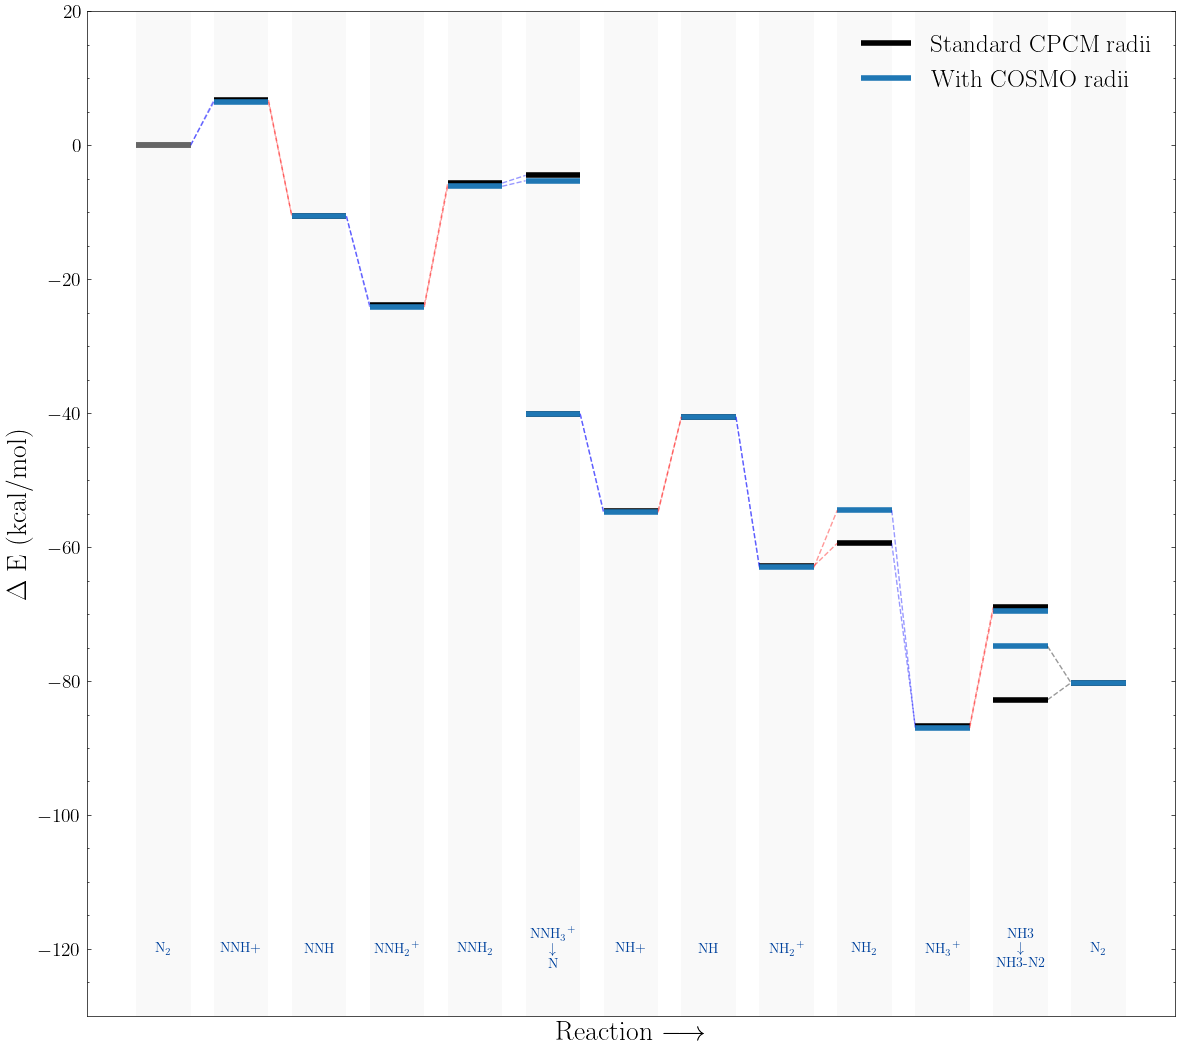

In [31]:
dict_key = "parts_radius_pbe_noegeo"
dict_key2 = "parts_radius_pbe_noegeo"
options = {
    "title": f"",
    "ylim": [-130, 20],
    "ylabel": r"$\Delta$ E (kcal/mol)",
    "save_path": "/home/magstr/Documents/Paper/figures/tmp.png",
    "legend": ["Standard CPCM radii", "With COSMO radii"],
    "exchange": True,
    "colors": colors,
    "arrows": False,
    "thermal_correction": False,
    "figsize": (12, 12),
    "diagrams": [
        [
            base / "schrock/diagrams_schrock/dft/cycle_orca_fullyconverged_sarcJ",
            "orca_stepsize.out",
            "FINAL SINGLE",
            dicts[dict_key],
            Path("/home/magstr/Documents/schrock/diagrams_schrock/vibrations_original_xtb/")
        ],
        [
            base / "schrock/diagrams_schrock/dft/cycle_orca_fullyconverged_radius_pbe",
            "orca.out",
            "FINAL SINGLE",
            dicts[dict_key2],
            Path("/home/magstr/Documents/schrock/diagrams_schrock/vibrations_original_xtb/")
        ],
    ],
}
options = defaultdict(lambda: False, options)

compare_data = get_diagram_dicts(options)

plot_diagrams(compare_data, options)

### Compared to the reference data

Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/cycle_orca_fullyconverged_sarcJ
NH3->N2 : 6.041866500861943
NH3->N2_NH3 : 29.507883050478995
NH3+->NH3 : 10.985970916924998
Doing diagram /home/magstr/Documents/schrock/diagrams_schrock/dft/cycle_orca_fullyconverged_radius_pbe
NH3->N2 : 6.525700258091092
NH3->N2_NH3 : 37.94738737959415
NH3+->NH3 : 10.79579425114207


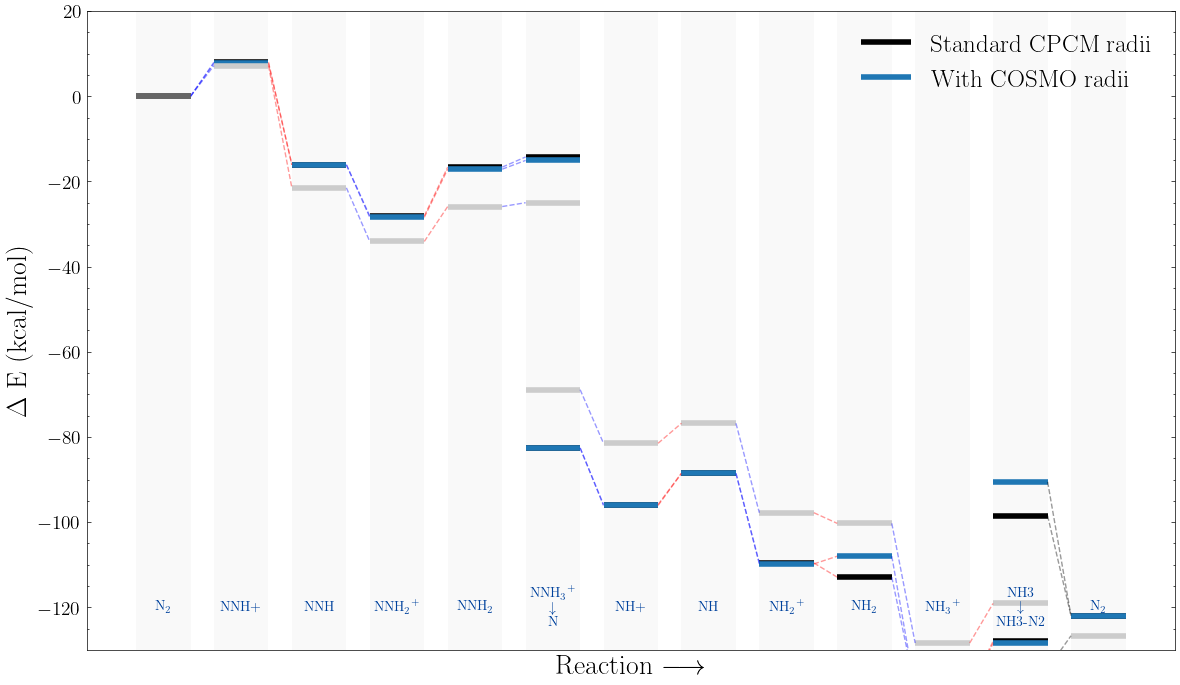

In [32]:
dict_key = "parts_b3lyp_sp_split"
dict_key2 = "parts_b3lyp_sp_split"
options = {
    "title": f"",
    "ylim": [-130, 20],
    "ylabel": r"$\Delta$ E (kcal/mol)",
    "save_path": "/home/magstr/Documents/Paper/figures/tmp2.png",
    "legend": ["Standard CPCM radii", "With COSMO radii"],
    "exchange": True,
    "colors": colors,
    "arrows": False,
    "thermal_correction": False,
    "figsize": (12, 12),
    "diagrams": [
        [
            base / "schrock/diagrams_schrock/dft/cycle_orca_fullyconverged_sarcJ",
            "orca_stepsize.out",
            "FINAL SINGLE",
            dicts[dict_key],
            Path("/home/magstr/Documents/schrock/diagrams_schrock/vibrations_original_xtb/")
        ],
        [
            base / "schrock/diagrams_schrock/dft/cycle_orca_fullyconverged_radius_pbe",
            "orca.out",
            "FINAL SINGLE",
            dicts[dict_key2],
            Path("/home/magstr/Documents/schrock/diagrams_schrock/vibrations_original_xtb/")
        ],
    ],
}
options = defaultdict(lambda: False, options)

compare_data = get_diagram_dicts(options)
compare_data["pbe_paper"] = collection["paper_pbe_diagram"]

plot_diagrams(compare_data, options)